In [1]:
from read import read_features

In [2]:
features_files = ['1_20151124_noon_2.csv', '2_20151106_noon.csv', '3_20151024_noon.csv','4_20151105_noon.csv', '4_20151107_noon.csv',
            '5_20141108_noon.csv', '5_20151012_night.csv', '6_20151121_noon.csv','7_20151015_night.csv', '8_20151022_noon.csv', 
            '9_20151017_night.csv', '10_20151125_noon.csv', '11_20151024_night.csv', '12_20150928_noon.csv', '13_20150929_noon.csv',
            '14_20151014_night.csv','15_20151126_night.csv', '16_20151128_night.csv', '17_20150925_noon.csv', '18_20150926_noon.csv',
            '19_20151114_noon.csv', '20_20151129_night.csv', '21_20151016_noon.csv']

In [3]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [4]:
file = './features/21_20151016_noon.csv'
#X, y = read_features(file, features=[2,3,4])
X, y = read_features(file)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X_minmax = scaler.fit_transform(X)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standar = scaler.fit_transform(X)

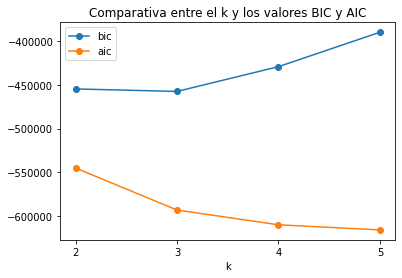

In [7]:
k_values = list(range(2, 5+1))
bic_scores = []
aic_scores = []
for k in k_values:
    gm = GaussianMixture(n_components=k, n_init=50)
    gm.fit(X_minmax)
    
    bic_scores.append(gm.bic(X_minmax))
    aic_scores.append(gm.aic(X_minmax))
    
plt.plot(k_values, bic_scores, '-o', label='bic')
plt.plot(k_values, aic_scores, '-o', label='aic')
plt.xticks(range(2,6))
#plt.ylim([0.25, 0.65])
plt.title('Comparativa entre el k y los valores BIC y AIC')
plt.xlabel('k')
plt.legend()
plt.show()

In [8]:
def gm_predictions_plot(X, y, n=3):
    gm = GaussianMixture(n_components=n, n_init=50)
    gm.fit(X)
    predictions = gm.predict(X)

    plt.figure(figsize=(20, 8))
    plt.plot(y, color='gray')
    plt.scatter(range(len(predictions)), y, c=predictions)
    plt.title('GMM - Coloreado del valor PERCLOS y el cluster asociado')
    plt.xlabel('Epoch')
    plt.ylabel('% PERCLOS')
    plt.show()

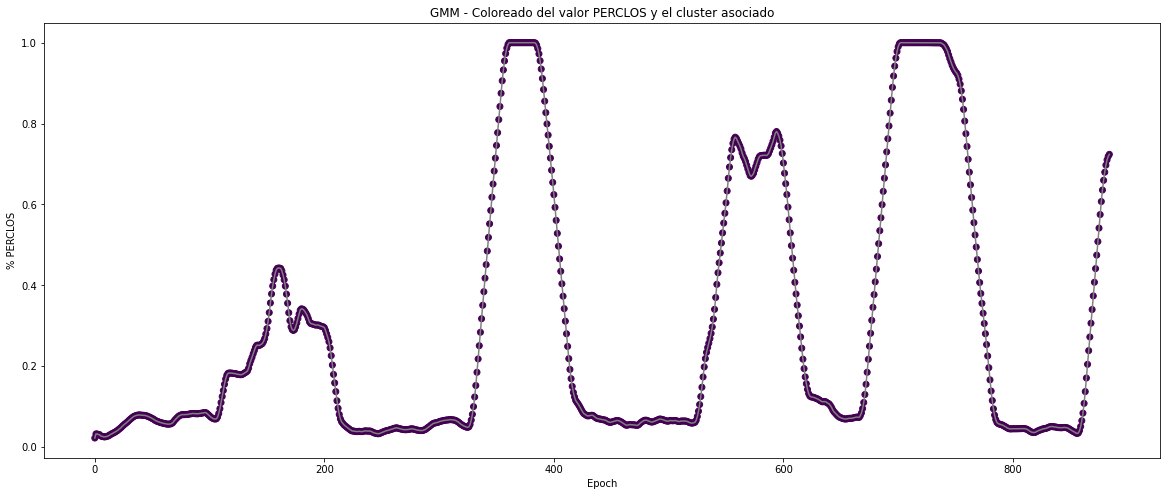

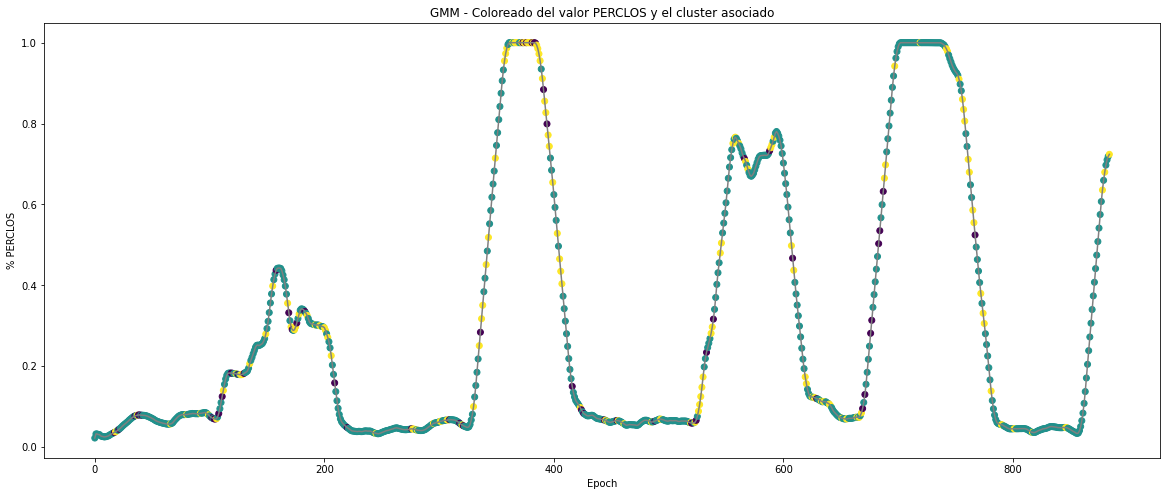

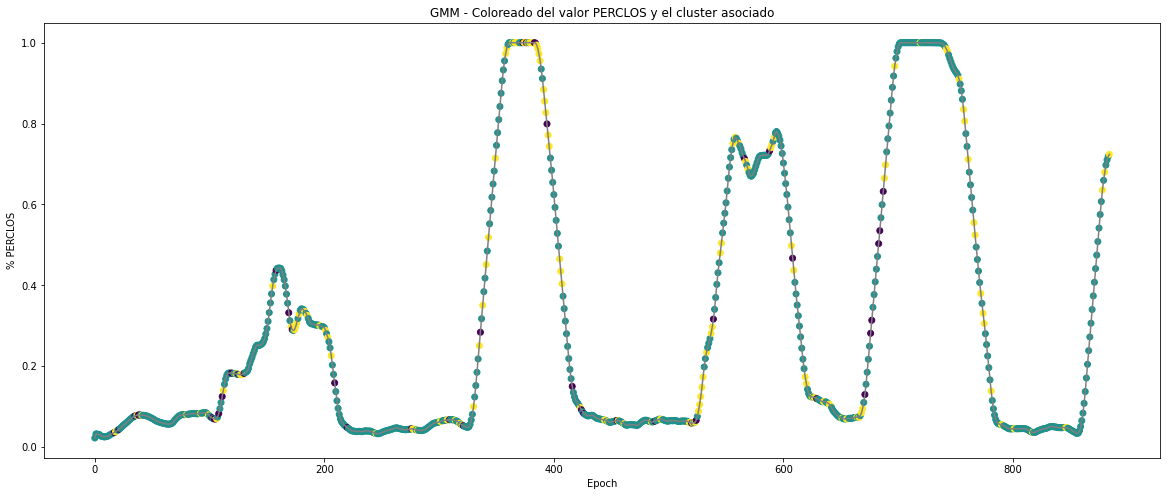

In [9]:
gm_predictions_plot(X, y)
gm_predictions_plot(X_minmax, y)
gm_predictions_plot(X_standar, y)

In [10]:
# La diferencia con GMM es que le pasas un numero de clusters superior y el algoritmo descarta aquellos que le sobran
def bgm_predictions_plot(X, y):
    bgm = BayesianGaussianMixture(n_components=6, n_init=20, random_state=42)
    bgm.fit(X)

    print(f'Ha convergido? {bgm.converged_}, n_its: {bgm.n_iter_}')
    print(np.round(bgm.weights_,2))

    predictions = bgm.predict(X)

    plt.figure(figsize=(20, 8))
    plt.plot(y, color='gray')
    plt.scatter(range(len(predictions)), y, c=predictions)
    plt.title('BGM - Coloreado del valor PERCLOS y el cluster asociado')
    plt.xlabel('Epoch')
    plt.ylabel('% PERCLOS')
    plt.show()

Ha convergido? False, n_its: 100
[0.   0.   0.06 0.   0.   0.94]


c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 20 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


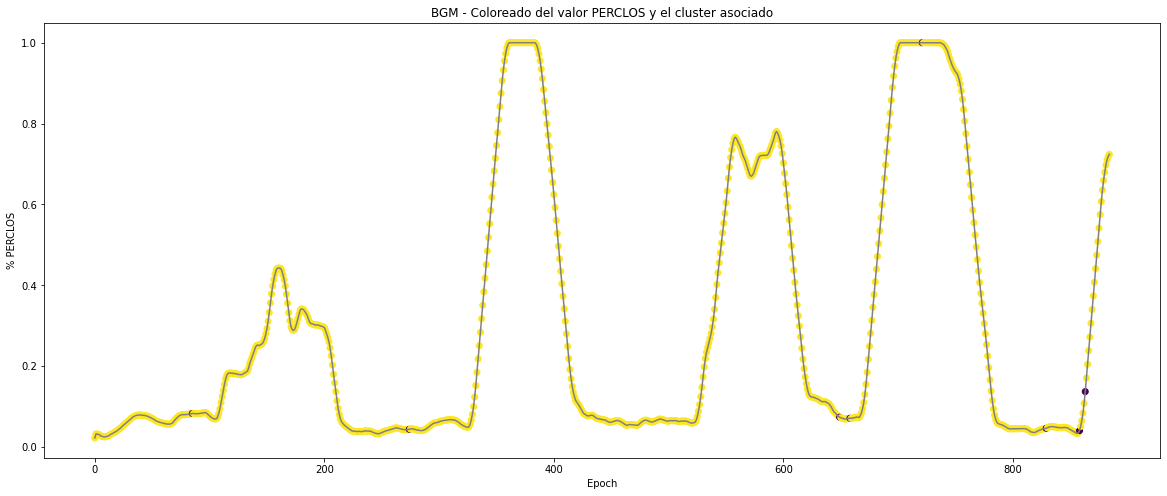

Ha convergido? True, n_its: 9
[0.75 0.17 0.01 0.06 0.   0.01]


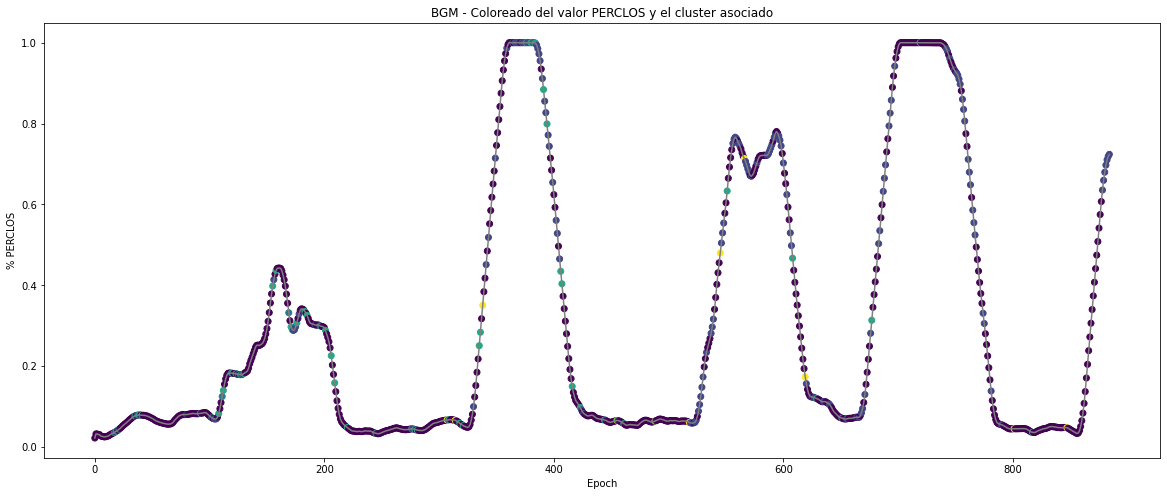

Ha convergido? True, n_its: 4
[0.7  0.03 0.05 0.19 0.01 0.02]


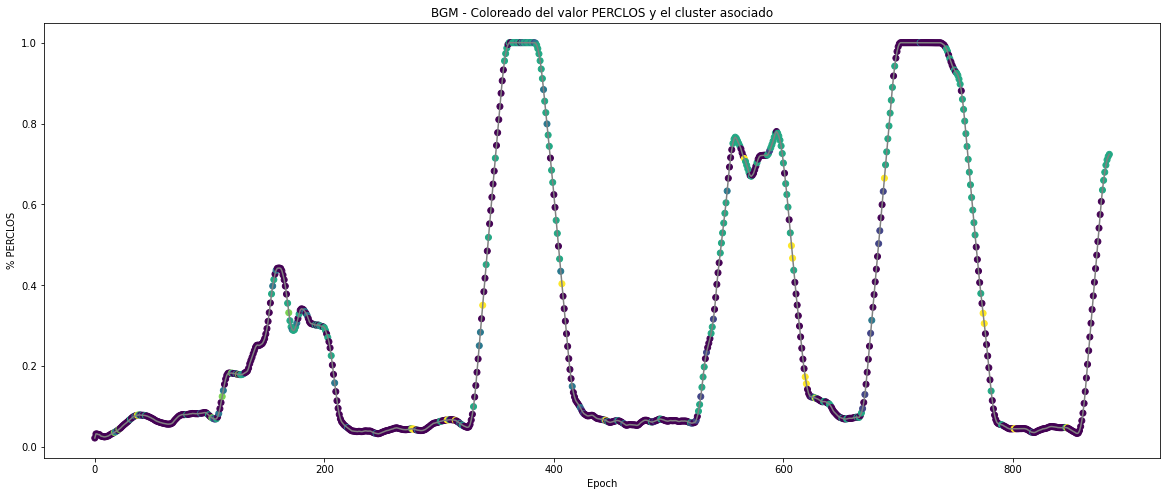

In [12]:
bgm_predictions_plot(X, y)
bgm_predictions_plot(X_minmax, y)
bgm_predictions_plot(X_standar, y)